In [1]:
dataset_url = 'https://www.kaggle.com/gpreda/covid19-tweets' 

In [2]:
import opendatasets as od
od.download(dataset_url)

Skipping, found downloaded files in ".\covid19-tweets" (use force=True to force download)


In [3]:
import pandas as pd
import numpy as np


In [4]:
# Change this
data_dir = './covid19-tweets'

In [5]:
import os
os.listdir(data_dir)

['covid19_tweets.csv']

In [6]:
data_set=pd.read_csv('./covid19-tweets/covid19_tweets.csv')

# Data Preparation and Cleaning

In [9]:
#Removing Duplicates
clean1_df=data_set.drop_duplicates()
if data_set.shape[0]==clean1_df.shape[0]:
    print("Dataset do not contains duplicate records")
else:
    print("Dataset contains Duplicate Records present")

Dataset do not contains duplicate records


In [10]:
#removing Blank records
print ('Number of blank records : ', clean1_df.user_name.isnull().sum())
clean2_df = clean1_df.dropna()

Number of blank records :  0


In [11]:
#cleaned dataset for analysis
covid19_tweets=clean2_df
covid19_tweets

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275,9525,7254,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197,987,1488,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009,168,101,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,🎹 Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180,1071,1287,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956,54810,3801,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179101,New Jersey Herald,"Newton, NJ","The New Jersey Herald, a daily newspaper in Ne...",2010-01-07 18:19:37,6274,162,38,False,2020-08-29 19:44:27,Wallkill school nurse adds COVID-19 monitoring...,"['nurses', 'COVID19', 'coronavirus', 'schools']",SocialNewsDesk,False
179102,Pris,T.O.,"A/V/L Techie, camera op. but twitter has becom...",2008-12-31 16:16:12,251,160,627,False,2020-08-29 19:44:23,"we have reached 25mil cases of #covid19, world...",['covid19'],Twitter Web App,False
179103,AJIMATI AbdulRahman O.,"Ilorin, Nigeria",Animal Scientist|| Muslim|| Real Madrid/Chelsea,2013-12-30 18:59:19,412,1609,1062,False,2020-08-29 19:44:21,Thanks @IamOhmai for nominating me for the @WH...,['WearAMask'],Twitter for Android,False
179104,Jason,Ontario,When your cat has more baking soda than Ninja ...,2011-12-21 04:41:30,150,182,7295,False,2020-08-29 19:44:16,2020! The year of insanity! Lol! #COVID19 http...,['COVID19'],Twitter for Android,False


In [7]:
# Exploratory Analysis and Visualization

In [12]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [13]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.express as px
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt


In [14]:
covid19_tweets.shape

(99138, 13)

In [22]:
covid19_tweets.columns

Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [23]:
# covid19_tweets.columns.type

AttributeError: 'Index' object has no attribute 'type'

##### UNIQUE USERS - Extracting total number of unique user from available datset

In [15]:
unique_User = covid19_tweets.user_name.unique()
print('Total Number Unique Users : ',unique_User.shape[0])

Total Number Unique Users :  53239


#### Total Number of Tweets - Here we are displaying total number of tweets thats listed in dataset

In [18]:
No_Of_Tweets = covid19_tweets.shape
print('Total Number of Tweets : ',No_Of_Tweets[0])

Total Number of Tweets :  99138


#### Top 10 User - Listng out top 10 User names

In [19]:
Top_ten_users = pd.DataFrame(covid19_tweets.user_name.value_counts().sort_values(ascending=False).head(10))
Top_ten_users

,user_name
covidnews.ch,402
GlobalPandemic.NET,320
Blood Donors India,282
Hindustan Times,267
IANS Tweets,228
OTV,212
COVID Scale,191
Sambad English,176
ANI,167
ABS-CBN News,164


#### Top 10 Sources of tweets - Lets try to analyse different source used and also their counts



In [20]:
Top_ten_sources = pd.DataFrame(covid19_tweets['source'].value_counts().sort_values(ascending=False).head(10))
Top_ten_sources = Top_ten_sources.rename(columns={'source':'count'})
Top_ten_sources

,count
Twitter Web App,32291
Twitter for Android,21462
Twitter for iPhone,18573
TweetDeck,5392
Hootsuite Inc.,4268
Twitter for iPad,2441
Buffer,1693
Instagram,1212
Sprout Social,1152
IFTTT,792


Plotting bar chart for above analysis thats helps in better understanding

In [21]:
trace = go.Bar(x = Top_ten_sources.index[:10],
              y = Top_ten_sources['count'][:10],
              marker = dict(color='rgba(150, 125, 180, 0.5)',
              line = dict(color='rgb(0,0,0)', width=1.5)))

layout = go.Layout(title="Top 10 Sources by no. of tweets",
                  xaxis=dict(title='Source Name',zeroline= False,
                         gridcolor='rgb(183,183,183)',showline=True),
                  yaxis=dict(title='Frequency of tweets',zeroline= False,
                            gridcolor='rgb(183,183,183)',showline=True),
                  font=dict(family='Courier New, monospace', size=12, color='rgb(0,0,0)')
)
data = [trace]
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [24]:
source_data = pd.DataFrame(covid19_tweets['source'].value_counts().sort_values(ascending=False))
source_data = source_data.rename(columns={'source':'count'})

In [25]:
data = {
   "values": source_data['count'][:15],
   "labels": source_data.index[:15],
   "domain": {"column": 0},
   "name": "Location Name",
   "hoverinfo":"label+percent+name",
   "hole": .4,
   "type": "pie"
}
layout = go.Layout(
   {
      "title":"Location Ratio",
}
)

data = [data]
fig = go.Figure(data = data, layout = layout)
iplot(fig)

## Visualiztion on Hashtags - Here we are using worldcloud to know hashtags that are highly used



In [26]:
def wordcloud(string):
    wc = WordCloud(width=800,height=500,mask=None,random_state=21, max_font_size=110,stopwords=stop_words).generate(string)
    fig=plt.figure(figsize=(16,8))
    plt.axis('off')
    plt.imshow(wc)

In [27]:
stop_words=set(STOPWORDS)
hastage_string = " ".join(covid19_tweets['hashtags'].unique().astype('str'))

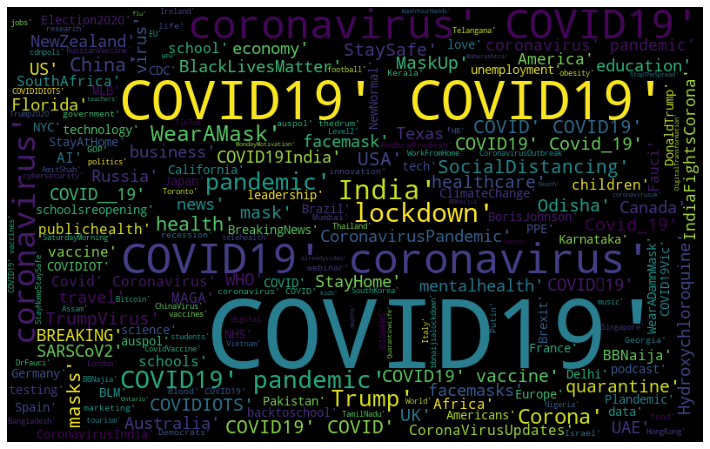

In [28]:
wordcloud(hastage_string)

In [ ]:
!git commit